In [8]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

# Load the model
model = tf.keras.models.load_model('D:/Latihan_Python/Notebooks/Tugas Akhir/801010  testing/mobilenetV1_CXR_lassification_801010.h5')

# Load the test dataset and labels
test_dataset =  np.load('D:/Latihan_Python/Notebooks/Tugas Akhir/801010  testing/Splitted_Dataset/test_dataset.npy')
test_labels =   np.load('D:/Latihan_Python/Notebooks/Tugas Akhir/801010  testing/Splitted_Dataset/test_labels.npy')


# Perform predictions on the test dataset using your model
test_predictions = model.predict(test_dataset)

# Convert the predicted probabilities into class labels
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_labels_classes = np.argmax(test_labels, axis=1)

# Generate the classification report
class_names = ['Normal', 'COVID-19', 'Viral Pneumonia']
classification_report = classification_report(test_labels_classes, test_predictions_classes, target_names=class_names)

# Print the classification report
print(classification_report)


10/10 [==============================] - 16s 1s/step
                 precision    recall  f1-score   support

         Normal       0.88      0.85      0.86        99
       COVID-19       0.94      0.99      0.97        99
Viral Pneumonia       0.90      0.88      0.89        98

       accuracy                           0.91       296
      macro avg       0.90      0.91      0.90       296
   weighted avg       0.90      0.91      0.90       296



In [9]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          target_names = ['Normal','Covid-19','Viral Pneumonia']):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names = target_names

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

5/5 [==============================] - 13s 3s/step


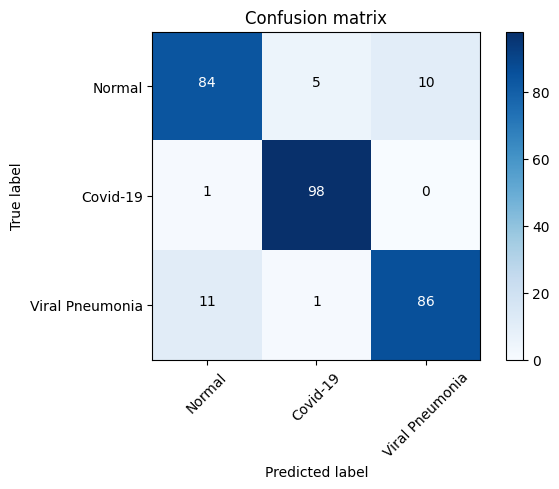

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Load the test dataset and labels
test_dataset =  np.load('D:/Latihan_Python/Notebooks/Tugas Akhir/801010  testing/Splitted_Dataset/test_dataset.npy')
test_labels =   np.load('D:/Latihan_Python/Notebooks/Tugas Akhir/801010  testing/Splitted_Dataset/test_labels.npy')


# Predict the values from the training dataset
training_predictions = model.predict(test_dataset, batch_size=64)
# Convert predictions classes from one hot vectors to label encodings
test_predictions_classes = np.argmax(test_predictions, axis = 1)
test_labels_classes = np.argmax(test_labels, axis =1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels_classes, test_predictions_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 